# Beta Diversity Analysis

In [3]:
# importing all required packages & notebook extensions at the start of the notebook
import os
import pandas as pd
import qiime2 as q2
from skbio import OrdinationResults
from qiime2 import Visualization
from seaborn import scatterplot

%matplotlib inline

In [3]:

! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/feature-table.qza \
  --i-phylogeny $data_dir/insertion-tree.qza \
  --m-metadata-file $data_dir/metadata_proc.tsv \
  --p-sampling-depth 1500 \
  --output-dir $data_dir/core-metrics-results

Saved FeatureTable[Frequency] to: w7_data/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: w7_data/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: w7_data/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: w7_data/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: w7_data/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: w7_data/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: w7_data/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: w7_data/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: w7_data/core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: w7_data/core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: w7_data/core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: w7_data/core-metrics

In [17]:
Visualization.load(f'{data_dir}/core-metrics-results/unweighted_unifrac_emperor.qzv')

<visualization: Visualization uuid: 4c3e0d6b-bd44-4aed-8a7e-a34ca7d78e02>

In [3]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir/core-metrics-results/unweighted_unifrac_distance_matrix.qza \
    --m-metadata-file $data_dir/metadata_proc.tsv \
    --m-metadata-column env \
    --p-pairwise \
    --o-visualization $data_dir/core-metrics-results/uw_unifrac-env-significance.qzv

Saved Visualization to: w7_data/core-metrics-results/uw_unifrac-env-significance.qzv


In [9]:
Visualization.load(f'{data_dir}/core-metrics-results/uw_unifrac-env-significance.qzv')

<visualization: Visualization uuid: 5ea763d8-80b9-45b2-bae4-7142c07cf24a>

In [15]:
pcs = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/unweighted_unifrac_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)
# let's just take the first 3 columns (i.e., first 3 PCoA axes)
pcs_data = pcs.samples.iloc[:,:3]
# rename the columns for clarity
pcs_data.columns = ['Axis 1', 'Axis 2', 'Axis 3']

Next join `pcs_data` with the `sample_type` column from the sample metadata and assign this to a new variable named `pcs_data_with_md`. If you like, you can subset this dataframe to plot only certain columns or a random subset of samples below. You can do this part:

Now we can plot these data. We will use the Python visualization library [seaborn](https://seaborn.pydata.org/) to quickly make a nice tidy [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). We will learn about `seaborn` and use it more in later sessions. Try changing the parameter values, or add other parameters like `size`, to see what happens.

<AxesSubplot:xlabel='Axis 1', ylabel='Axis 2'>

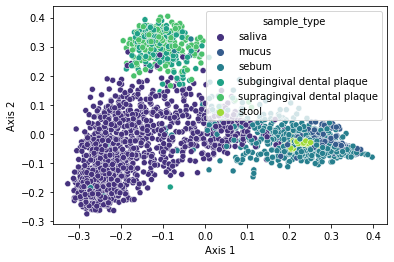

In [23]:
scatterplot(data=pcs_data_with_md,
            x='Axis 1',
            y='Axis 2',
            hue='sample_type',
            palette='viridis')